In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.api import qqplot

In [4]:
students= pd.read_csv('students.csv')
height= students.height

# One population variance Testing using $\chi^2$ test
In order to showcase the one standard deviation χ2-test we examine the spread of the height in cm of female students and compare it to the spread of the height of the all students (our population). We want to test, if the standard deviation of the height of female students is less than standard deviation of the height of all students.

In [5]:
female_height= height[students.gender== 'Female']
sigma0= np.std(height) # Population standard deviation
sigma0

11.07685685261271

In [6]:
# Collect sample of size 30
n= 30
sample_height= np.random.choice(female_height, n)

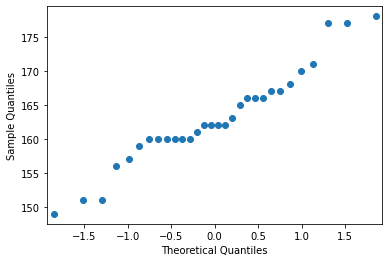

In [7]:
# Verify normality of assumptions using QQ plot
qqplot(sample_height); #for the sake of work we can say the data is roughly normal

$\Large{Formulate~~hypothesis}$<br>
$H_0:\sigma= \sigma_0$<br>
$H_a: \sigma< \sigma_0$<br>
$\alpha= 0.05$<br>
The test will be left tail $\chi^2$ test

In [8]:
s= np.std(sample_height)
chi2= ((n-1)/ sigma0**2)*(s**2)
chi2

11.539642064092671

In [9]:
stats.chi2.cdf(chi2, n-1)

0.0015867468980097642

p-value< alpha. Therefore we have to reject the null hypothesis.

# Two population variance Testing using $\chi^2$ test

In order to showcase the two standard deviations F-test we examine once again the height variable in the students data set. We compare the spread of the height of female students and the spread of the height of male students. We want to test, if the standard deviation of the height of female students (σ1) is different from the standard deviation of the height of male students (σ2).

In [10]:
male_height= students[students.gender== 'Male'].height

In [16]:
n= 25
male_sample= np.random.choice(male_height, n)
female_sample= np.random.choice(female_height, n)

In [27]:
# Calculate standard deviations
s_male= np.std(male_sample)
s_female= np.std(female_sample)

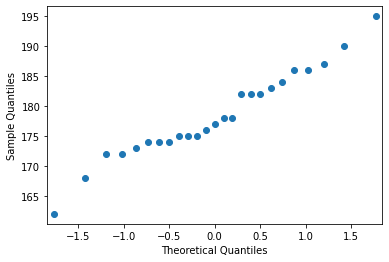

In [28]:
qqplot(male_sample);

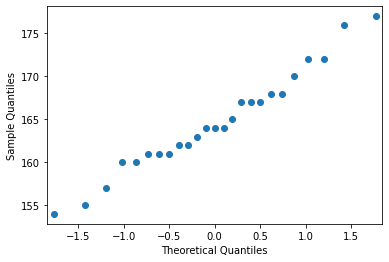

In [29]:
qqplot(female_sample);

In [30]:
# Test statistic F
F= s_female**2/ s_male**2

In [31]:
# Calculate P Value
stats.f.cdf(F, 24, 24)

0.1434167579011749

p value> alpha= 0.05. Reject Null Hypothesis.